In [ ]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [ ]:
N = 200      # full system length (sites)
t = 1.0       # hopping amplitude

# build & diagonalise the tight‑binding hopping Hamiltonian
H_tb = np.zeros((N, N), dtype=np.float64)
for i in range(N):
    H_tb[i, (i + 1) % N] = -t
    H_tb[i, (i - 1) % N] = -t

evals, evecs = la.eigh(H_tb)

In [ ]:
# half‑filling: occupy the M_occ lowest single‑particle states
M_occ = 100
occu_idx = np.argsort(evals)[:M_occ]
occu_psi = evecs[:, occu_idx]

# full correlation matrix  C_{ij} = <c_i† c_j>
C_full = occu_psi @ occu_psi.conj().T

# entanglement entropy S_A(M) for all subsystem sizes
Ms = np.arange(1, M_occ + 1)
S_bits = np.empty_like(Ms, dtype=np.float64)

In [ ]:
entropies = np.empty_like(Ms, dtype=np.float64);
for k, M in enumerate(Ms):
    C_sub = C_full[:M, :M]                 # take the top‑left M×M block
    zeta = la.eigvalsh(C_sub)              # eigenvalues of C_sub (0 ≤ ζ ≤ 1)

    # clip to avoid numerical issues log(0)
    zeta = np.clip(zeta, 1e-14, 1 - 1e-14)
    S_A = -np.sum(zeta * np.log(zeta) + (1 - zeta) * np.log(1 - zeta))
    entropies[k] = S_A

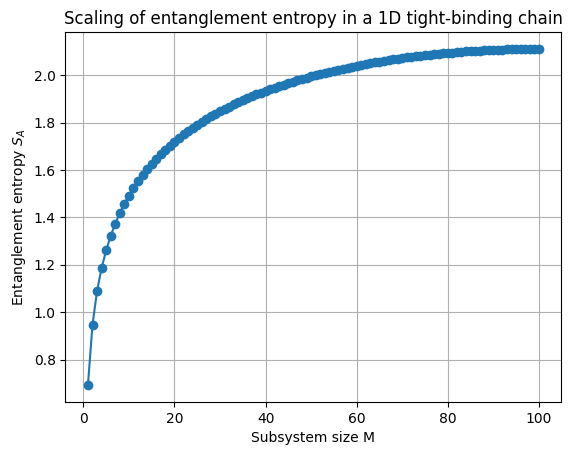

In [ ]:
plt.figure()
plt.plot(Ms, entropies, marker='o')
plt.xlabel("Subsystem size M")
plt.ylabel(r"Entanglement entropy $S_A$")
plt.title("Scaling of entanglement entropy in a 1D tight‑binding chain")
plt.grid(True)
plt.show()


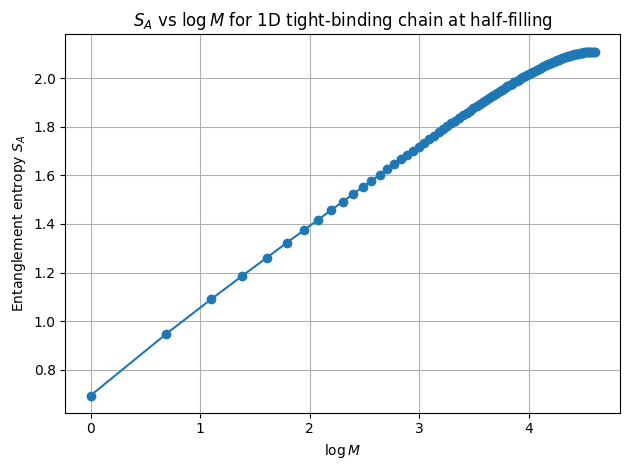

In [ ]:
# plot S_A over log(M)
plt.figure()
plt.plot(np.log(Ms), entropies, marker='o')
plt.xlabel(r"$\log M$")
plt.ylabel(r"Entanglement entropy $S_A$")
plt.title(r"$S_A$ vs $\log M$ for 1D tight-binding chain at half-filling")
plt.grid(True)
plt.tight_layout()
plt.show()

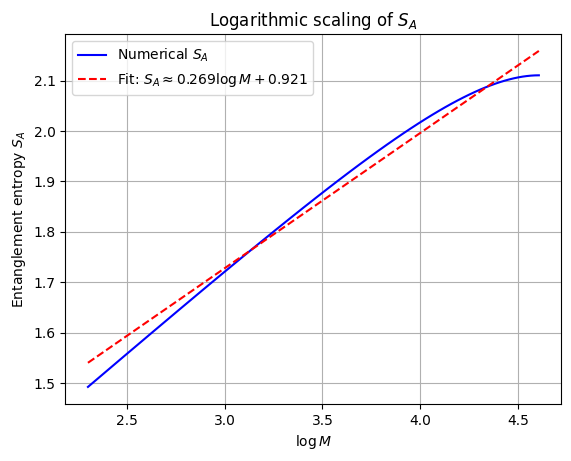

In [ ]:
# restrict to larger M values for a cleaner log scaling region
mask = Ms >= 10

# perform linear fit: S = a * log(M) + b
logM = np.log(Ms[mask])
S_fit = entropies[mask]
a, b = np.polyfit(logM, S_fit, deg=1)

# print fitted parameters
fit_result = {
    "a (slope)": a,
    "b (intercept)": b,
}

# new plot
plt.figure()
plt.plot(logM, S_fit, label=r"Numerical $S_A$", color='blue')
plt.plot(logM, a * logM + b, label=fr"Fit: $S_A \approx {a:.3f} \log M + {b:.3f}$", linestyle='--', color='red')
plt.xlabel(r"$\log M$")
plt.ylabel(r"Entanglement entropy $S_A$")
plt.title("Logarithmic scaling of $S_A$")
plt.legend()
plt.grid(True)
plt.show()

